<a href="https://colab.research.google.com/github/abhinandanjoshi/DS-Capston-project/blob/master/Text_GenerationUsingLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In text generation, we try to predict the next character or word of the sequence. The text data generally considered as sequence of data. For predicting data in sequence we used deep learning models like RNN or LSTM. LSTM are preferred over RNN in this because of RNN vanishing and exploding gradients problem. Since in text generation we have to memorize large amount of previous data. So for this purpose LSTM are preferred.

The phrases in text are nothing but sequence of words. So, LSTM can be used to predict the next word. The neural network take sequence of words as input and output will be a matrix of probability for each word from dictionary to be next of given sequence. The model will also learn how much similarity is between each words or characters and will calculate the probability of each. Using that we will predict or generate next word or character of sequence.



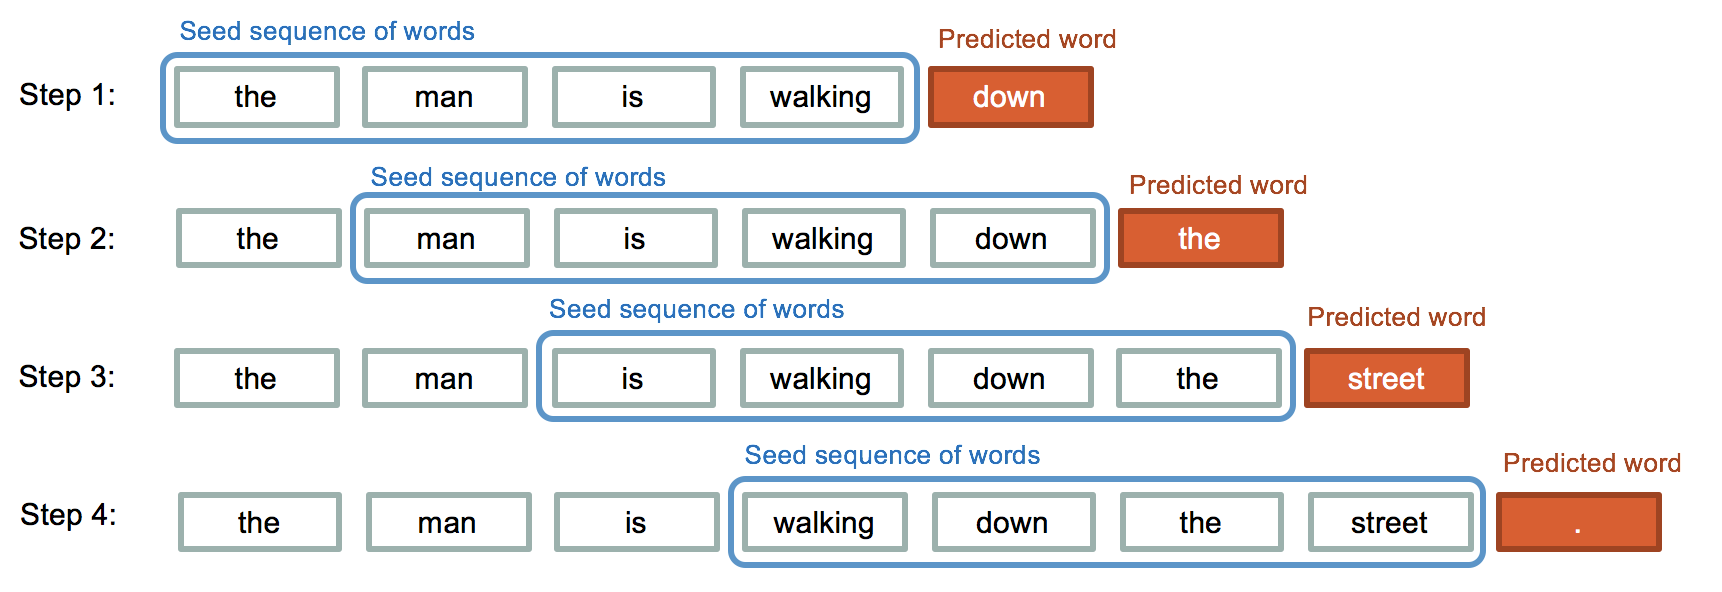

In [ ]:
from PIL import Image
Image.open('LSTM.png')

LSTM (Long Short Term Memory)\
As we discussed RNN are not able memorize data for long time and begins to forget its previous inputs. To overcome this problem of vanishing and exploding gradient LSTM is used. They are used as solution for short term memory learning. Also in RNN when a new information is added RNN completely modifies the existing information. RNN is not able to distinguish between important or not so important information. Whereas in LSTM there is small modification in existing information when a new information is added because LSTM contains gate which determine the flow of information.



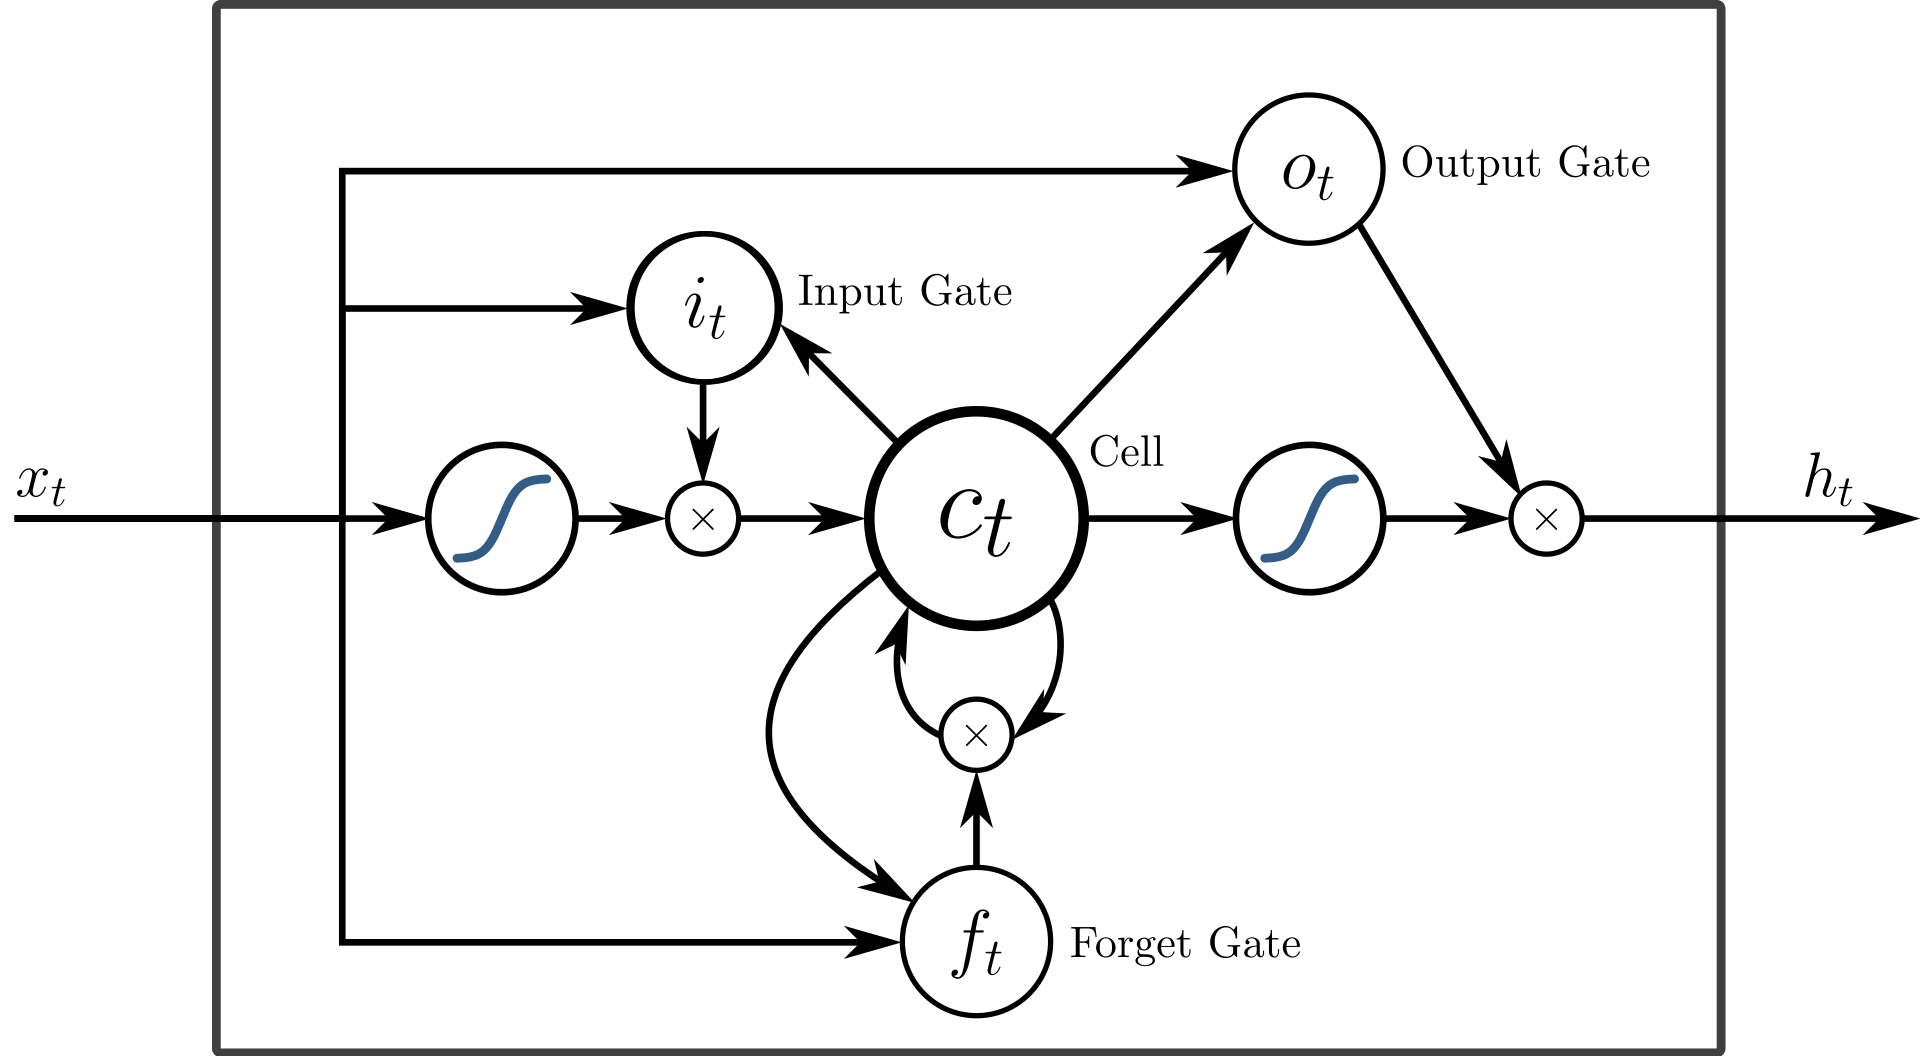

In [ ]:
Image.open('flow1.png')

The gates decide which data is important and can be useful in future and which data has to be erased. The three gates are input gate, output gate and forget gate.

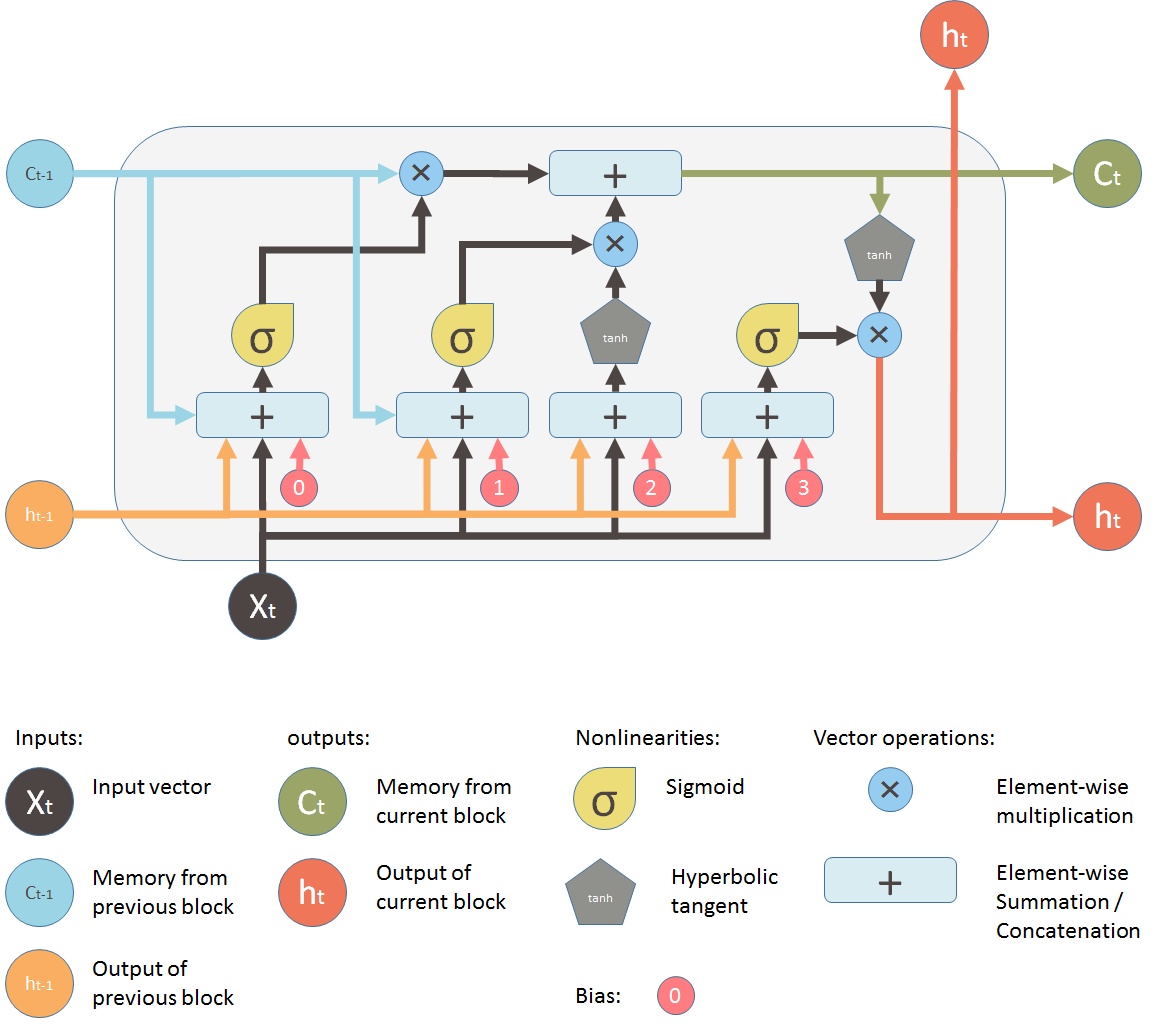

In [ ]:
Image.open('flow2.png')

Forget Gate:\
This gate decide which information is important and should be stored and which information to forget. It removes the non important information from neuron cell. This results in optimization of performance. This gate takes 2 input- one is the output generated by previous cell and other is input of current cell. Following required bias and weights are added and multiplied and sigmoid function is applied to the value. A value between 0 and 1 is generated and based on this we decide which information to keep. If value is 0 the forget gate will remove that information and if value is 1 then information is important and has to be remembered.

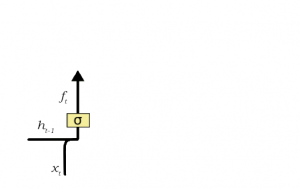

In [ ]:
Image.open('flow3.png')

Input Gate:\
 This gate is used to add information to neuron cell. It is responsible of what values should be added to cell by using activation function like sigmoid. It creates an array of information that has to be added. This is done by using another activation function called tanh. It generates a values between -1 and 1. The sigmoid function act as a filter and regulate what information has to be added in cell.


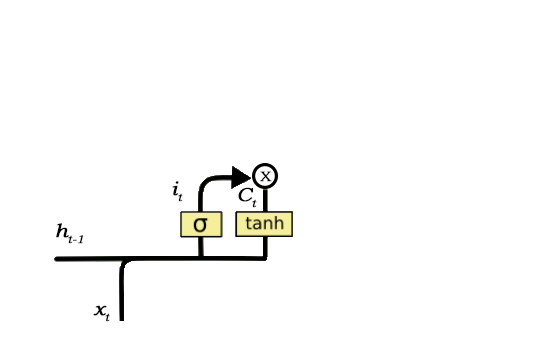

In [ ]:
Image.open('flow4.png')

Output Gate:\
 This gate is responsible for selecting important information from current cell and show it as output. It creates a vector of values using tanh function which ranges from -1 to 1. It uses previous output and current input as a regulator which also includes sigmoid function and decides which values should be shown as output.

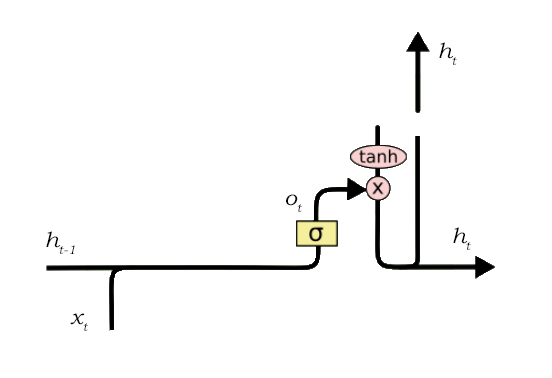

In [ ]:
Image.open('flow5.png')

**Implementation**\
For text generation we will perform tasks like:

Load the necessary libraries required for LSTM and NLP purposes
Load the text data
Performing the required text cleaning
Create a dictionary of words with keys as integer values
Prepare dataset as input and output sets using dictionary
Define our LSTM model for text generation

We will also implement some techniques of Natural Language Processing using NLTK like tokenization, pre-process text etc.
Now will begin to implement our LSTM model for our text generation.
We will be requiring lot of text data as to generate better results.
We are using text which is based on book written by Charles Dickens. We will be using 5 chapters of that book.

We will load the necessary libraries required for LSTM, data preprocessing and NLP purposes

In [ ]:
#All Libraries required 
import numpy
import sys
from nltk.corpus import stopwords
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint

In [ ]:
file = open("Two-Tails.txt").read()

Since computer cannot process text data. So we have convert it to computer readable form. This can be done by 2 process - One Hot Encoding or Word Embedding.

One Hot Encoding involves converting the text into 1's and O's vector. It will create a bag of words which represent the frequency of each word in document. They are considered simple models, which maintain lot of important information and are very versatile.

While in word embedding it represent text words as vector of real numbers. It can use more numbers than 0 and 1.\
Now we will apply the tokenization which means considering each word separately

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
words=word_tokenize(file)
words=" ".join(words)
processed_inputs=words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Now we have to convert our text into numbers using the techniques we discussed above.

In [ ]:
chars = sorted(list(set(processed_inputs)))
char_to_num = dict((c, i) for i, c in enumerate(chars))

This will create a sets of unique characters in text then using enumerate function to generate numbers of each character.

We will also store length of input and stores set of characters

In [ ]:
input_len = len(processed_inputs)
vocab_len = len(chars)

Now we have to define the sequence length which means length of input characters as integers. We will set it to length of 100

In [ ]:
seq_length = 100
x_data = []
y_data = []

Now we will convert out data into computer readable form

In [ ]:
for i in range(0, input_len - seq_length, 1):
    in_seq = words[i:i + seq_length]
    out_seq = words[i + seq_length]

    x_data.append([char_to_num[chars] for chars in in_seq])
    y_data.append(char_to_num[out_seq])
    
n_patterns = len(x_data)


Now we have the input sequence of data as x and our output as y. Also we stored the number of patterns. We have also convert out input sequence into right shape so it can be fed to neural network. Also we have to apply one hot encoder to our output variable

In [ ]:
X = numpy.reshape(x_data, (n_patterns, seq_length, 1))
X = X/float(vocab_len)
y = np_utils.to_categorical(y_data)

Now we have the input in required shape and form along with output. Now we have to implement our LSTM model.

We will implement it using Keras which is an API of tensorflow. We will be using 3 - Layer model with dropout to prevent overfitting. The first LSTM layer is initialized with 256 units of memory and it will store and return sequence of data rather random scattered data. Last layer will be the output layer which will generate a probability about what next character in sequence. And then we will compile our model with adam optimizer.


In [ ]:
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(256, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam')

After compilation we will fit our model with generated input and output.

In [ ]:
model.fit(X, y, epochs=4, batch_size=256,callbacks=desired_callbacks)

Epoch 1/4
 940/3141 [=======>......................] - ETA: 2:20:11 - loss: 2.9622

For better results, set the value of epochs more than 15

Since we converted the characters to numbers earlier, we need to define a dictionary variable that will convert the output of the model back into numbers


In [ ]:
num_to_char = dict((i, c) for i, c in enumerate(chars))